## Demonstrate opening OMI HDF5 files from  NASA GES DISC

In [6]:
# Import Python packages (tools for working with geospatial data)
import rasterio 
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib notebook
%qtconsole

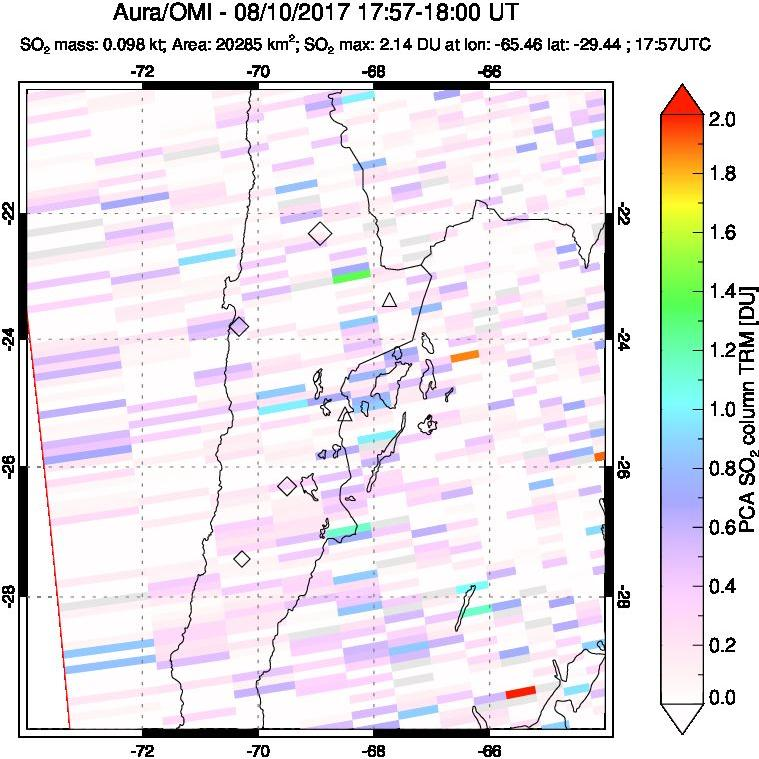

In [70]:
# Try to reproduce figure from SO2 omi page:
# https://so2.gsfc.nasa.gov
# https://so2.gsfc.nasa.gov/pix/daily/ixxxza/loopall5pca.php?yr=17&mo=08&dy=10&bn=nchile
from IPython.display import Image
Image("https://so2.gsfc.nasa.gov/pix/daily/0817/nchile_so2pca_5k_20170810.jpg")

## Get data

There are lots of places to get data. This website has a summary:
[https://disc.sci.gsfc.nasa.gov/datasets/OMSO2e_V003/summary](https://disc.sci.gsfc.nasa.gov/datasets/OMSO2e_V003/summary)

In [4]:
# Download a file from GES DISC. 

# GEt a level 2 file (note that the !wget calls the system command 'wget')
#!wget http://aura.gesdisc.eosdis.nasa.gov/data///Aura_OMI_Level2/OMSO2.003/2017/224/OMI-Aura_L2-OMSO2_2017m0812t1529-o69556_v003-2017m0812t224830.he5

# Get a level 3 file
#!wget http://acdisc.gesdisc.eosdis.nasa.gov/data///Aura_OMI_Level3/OMSO2e.003/2017/OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5

In [18]:
!gdalinfo OMI-Aura_L2-OMSO2_2017m0812t1529-o69556_v003-2017m0812t224830.he5 -nogcp


Driver: HDF5/Hierarchical Data Format Release 5
Files: OMI-Aura_L2-OMSO2_2017m0812t1529-o69556_v003-2017m0812t224830.he5
Size is 512, 512
Coordinate System is `'
Metadata:
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_AuthorAffiliation=JCET/UMBC
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_AuthorName=N. Krotkov, K. Yang, S. Carn, A.J. Krueger (UMBC)
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleDay=12 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleMonth=8 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleYear=2017 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_InputVersions=OMSO2:0.1
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_InstrumentName=OMI
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_OrbitData=PREDICTED
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_PGEVERSION=0.1.7
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_ProcessingCenter=OMI SIPS
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_ProcessingHost=Linux minion7074 3.10.0-514.16.1.el7.x86_64 x86_64
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_ProcessLevel=2
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_TAI93At0zOfGranule=776649610 
  HDF

## Read data with python

There are various ways to do this. "Rasterio" is a great library for working with geospatial raster imagery. Read more about it [here](https://mapbox.github.io/rasterio/#)

http://hdfeos.org/software/tool.php
Basic example: http://hdfeos.org/software/h5py.php

Advanced examples: http://hdfeos.org/zoo/index_openGESDISC_Examples.php

Other
http://scitools.org.uk/iris/
rasterio
xarray

In [4]:
# Level 2
#filepath = "./OMI-Aura_L2-OMSO2_2017m0812t1529-o69556_v003-2017m0812t224830.he5"
#src = rasterio.open(filepath)

In [8]:
# So far we've just loaded the metadata of the file. Note rasterio doesn't seem to know how to deal with .he5 :()
src.meta

{'affine': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0),
 'count': 0,
 'crs': CRS({}),
 'driver': 'HDF5',
 'dtype': 'float_',
 'height': 512,
 'nodata': None,
 'transform': (0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 'width': 512}

## h5py

http://docs.h5py.org/en/latest/quick.html

In [45]:
# Level 2
filepath = "./OMI-Aura_L2-OMSO2_2017m0812t1529-o69556_v003-2017m0812t224830.he5"
# Load and examine subdatasets
f = h5py.File(filepath, mode='r')
for name in f:
    print(name)

HDFEOS
HDFEOS INFORMATION


In [49]:
f.visit(lambda x: print(x))

HDFEOS
HDFEOS/ADDITIONAL
HDFEOS/ADDITIONAL/FILE_ATTRIBUTES
HDFEOS/SWATHS
HDFEOS/SWATHS/OMI Total Column Amount SO2
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/AlgorithmFlag_PBL
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/AlgorithmFlag_STL
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/AlgorithmFlag_TRL
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/AlgorithmFlag_TRM
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ChiSquareLfit
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/CloudPressure
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountO3
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2_PBL
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2_PBLbrd
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2_STL
HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2_STLbrd
HDFEOS/SWATHS/OMI Total Column Amoun

In [56]:
# Level 3
filepath = "./OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5"
# Load and examine subdatasets
f = h5py.File(filepath, mode='r')

f.visit(lambda x: print(x))

HDFEOS
HDFEOS/ADDITIONAL
HDFEOS/ADDITIONAL/FILE_ATTRIBUTES
HDFEOS/GRIDS
HDFEOS/GRIDS/OMI Total Column Amount SO2
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/ColumnAmountO3
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2_PBL
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/Latitude
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/LineNumber
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/Longitude
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/OrbitNumber
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/PacificSectorAverage
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/RadiativeCloudFraction
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/RelativeAzimuthAngle
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/SceneNumber
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/SlantColumnAmountSO2
HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/SolarZenithAngle
HDFEOS

In [57]:
so2 = f['HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/ColumnAmountO3']

<HDF5 dataset "ColumnAmountO3": shape (720, 1440), type "<f4">

In [59]:
lat = f['HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/Latitude']
lon = f['HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/Longitude']

In [104]:
# Each dataset has associated metadata
for a in so2.attrs:
    print(a, so2.attrs[a])
    
# Some of these are floats, others are strings, extracting values is difference depending on which:
nodata = so2.attrs['MissingValue'][0]
units = so2.attrs['Units'].decode()
titlestr = so2.attrs['Title'].decode()
titlestr = so2.attrs['UniqueFieldDefinition'].decode()

_FillValue [ -1.26765060e+30]
Units b'DU'
Title b'Best Total Ozone Solution'
UniqueFieldDefinition b'TOMS-OMI-Shared'
ScaleFactor [ 1.]
Offset [ 0.]
ValidRange [  50.  700.]
MissingValue [ -1.26765060e+30]


In [86]:
data = so2.value
nodata = so2.attrs['MissingValue']
data[so2.value == nodata] = np.nan

<IPython.core.display.Javascript object>


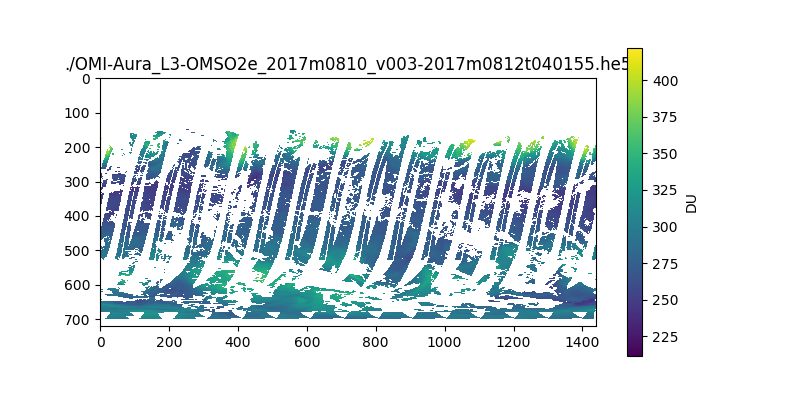

In [103]:
plt.figure(figsize=(8,4))
plt.imshow(data)
cb = plt.colorbar()
cb.set_label(units)
plt.title(filepath)

In [105]:
# Warning: slow.
''' 
plt.figure(figsize=(8,4))
plt.scatter(lon.value, lat.value, c=data) 
plt.colorbar()
plt.title(titlestr)
plt.xlabel('Longitude (deg)')
plt.xlabel('Latitude (deg)')
'''

" \nplt.figure(figsize=(8,4))\nplt.scatter(lon.value, lat.value, c=data) \nplt.colorbar()\nplt.title(titlestr)\nplt.xlabel('Longitude (deg)')\nplt.xlabel('Latitude (deg)')\n"

<IPython.core.display.Javascript object>


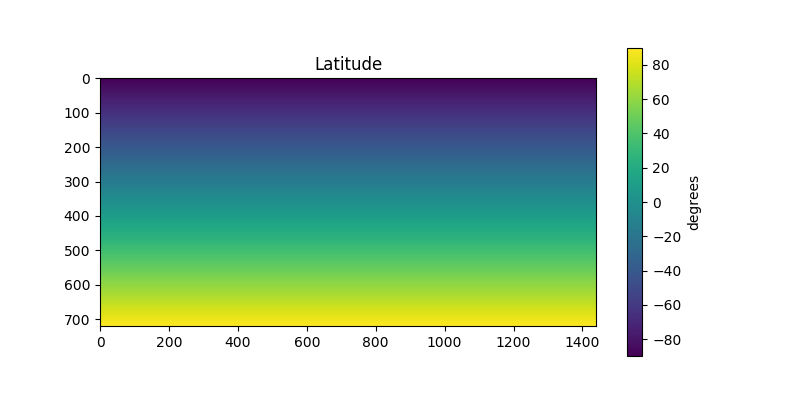

<IPython.core.display.Javascript object>


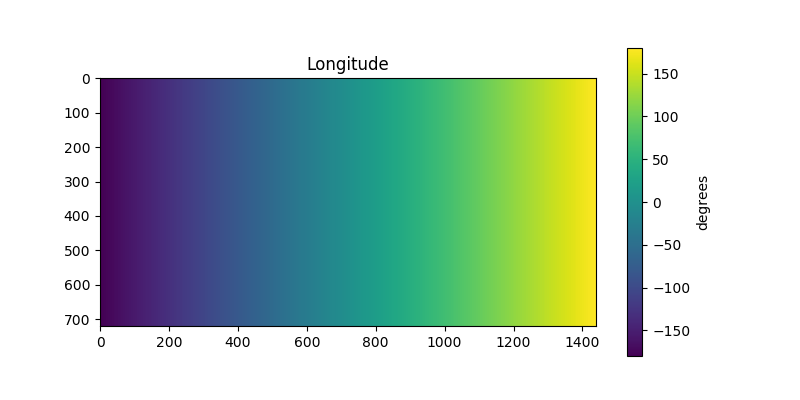

In [108]:
# Check if latitude and longitude are switched - NOTE: latitude is.
plt.figure(figsize=(8,4))
plt.imshow(lat.value)
cb = plt.colorbar()
cb.set_label('degrees')
plt.title('Latitude')

plt.figure(figsize=(8,4))
plt.imshow(lon.value)
cb = plt.colorbar()
cb.set_label('degrees')
plt.title('Longitude')

<IPython.core.display.Javascript object>


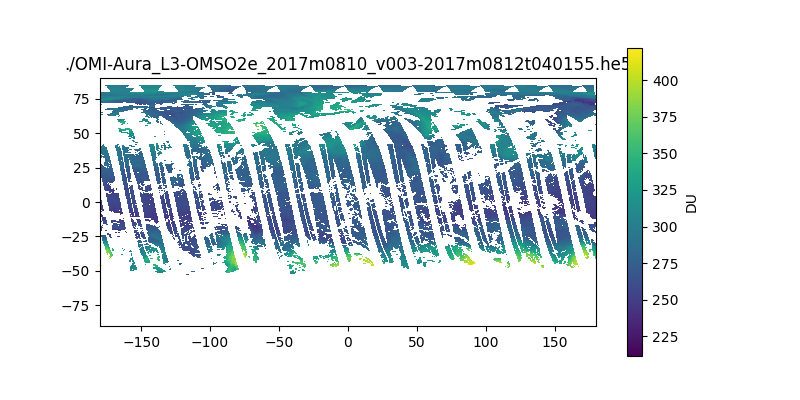

In [121]:
# Plot map with standard coordinates
# Since latitude grid is flipped, flip the data array
data = np.flipud(data)

extent = [lon.value.min(), lon.value.max(), lat.value.min(), lat.value.max()] #(left, right, bottom, top),

plt.figure(figsize=(8,4))
plt.imshow(data, extent=extent)
cb = plt.colorbar()
cb.set_label(units)
plt.title(filepath)


<IPython.core.display.Javascript object>


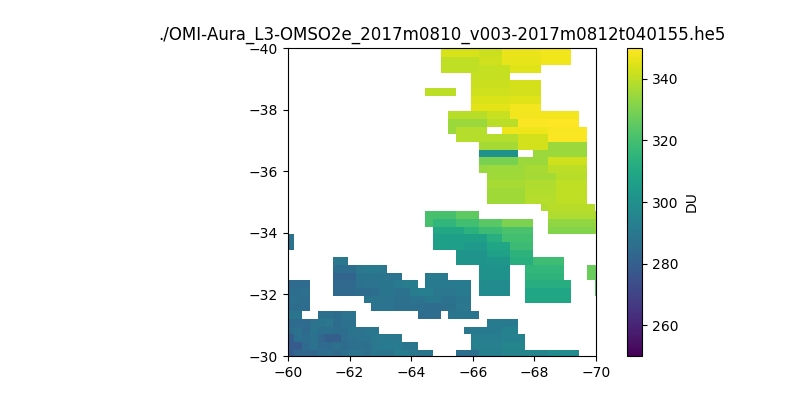

In [124]:
# Zoom in on area of interest
extent = [lon.value.min(), lon.value.max(), lat.value.min(), lat.value.max()] #(left, right, bottom, top),

plt.figure(figsize=(8,4))
plt.imshow(data, extent=extent)
cb = plt.colorbar()
cb.set_label(units)
plt.title(filepath)

plt.xlim(-60, -70)
plt.ylim(-30, -40)
plt.clim(250, 350)